## Fig1. Plotting Optimization Landscape wrt the Warping Parameter


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
import copy
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
currentdir = os.path.dirname(os.path.realpath('Fig1_Landscape.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

#### 1) just generate a dataset from a 1-knot piecewise linear warped model.

In [173]:
from affinewarp.datasets import piecewise_warped_data
binned, true_model = piecewise_warped_data(
    n_knots=1,
    n_trials=1,
    n_timepoints=2800,
    n_neurons=1,
    clip_y_knots=True,
    template_scale=1.0,
    template_drop=.9,
    template_smoothness=0,
    noise_type="",
    seed=1234)

In [174]:
m=copy.deepcopy(true_model)
knot_loc=np.arange(0.05,1,0.01)
obj_all=np.zeros((len(knot_loc),len(knot_loc)))
m._initialize_storage(1)
slope1_all=np.zeros((len(knot_loc),len(knot_loc)))
slope2_all=np.zeros((len(knot_loc),len(knot_loc)))

for i in range(0,len(knot_loc)):
    for j in range(0,len(knot_loc)):
        m.y_knots[0,1]=knot_loc[i]
        m.x_knots[0,1]=knot_loc[j]
        slope1_all[i,j]=knot_loc[i]/knot_loc[j]
        slope2_all[i,j]=(1-knot_loc[i])/(1-knot_loc[j])
        #m._fit_template(data)
        #m._record_loss(binned)
        obj_all[i,j]=np.sum((m.predict()-binned)**2)#m.objective_hist[-1]

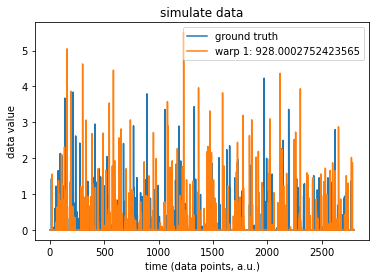

In [175]:
plt.plot(np.squeeze(binned))

m.y_knots[0,1]=0.1
m.x_knots[0,1]=0.1
obj1=np.sum((m.predict()-binned)**2)
plt.plot(np.squeeze(m.predict()))

plt.title('simulate data')
plt.xlabel('time (data points, a.u.)')
plt.ylabel('data value')
plt.legend(['ground truth','warp 1: '+str(obj1)])

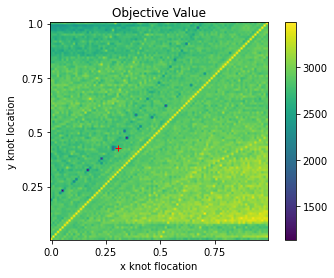

In [171]:
# Plot data.
plt.imshow(np.flipud(obj_all), aspect='equal')
plt.title('Objective Value'), plt.xlabel('x knot flocation'), plt.ylabel('y knot location')
ax=plt.gca()
locs, labels = plt.xticks()
plt.xticks(np.linspace(0,len(knot_loc),5),np.linspace(0,1,5))
plt.yticks(np.flipud(np.linspace(0,len(knot_loc),5)),np.linspace(0,1,5))
plt.plot(true_model.x_knots[0,1]*len(knot_loc),(1-true_model.y_knots[0,1])*len(knot_loc),'r+')

plt.colorbar()

#### 2) Varying smoothness and sparsity of data. Plot landscape

Text(0.04, 0.5, 'sparsity')

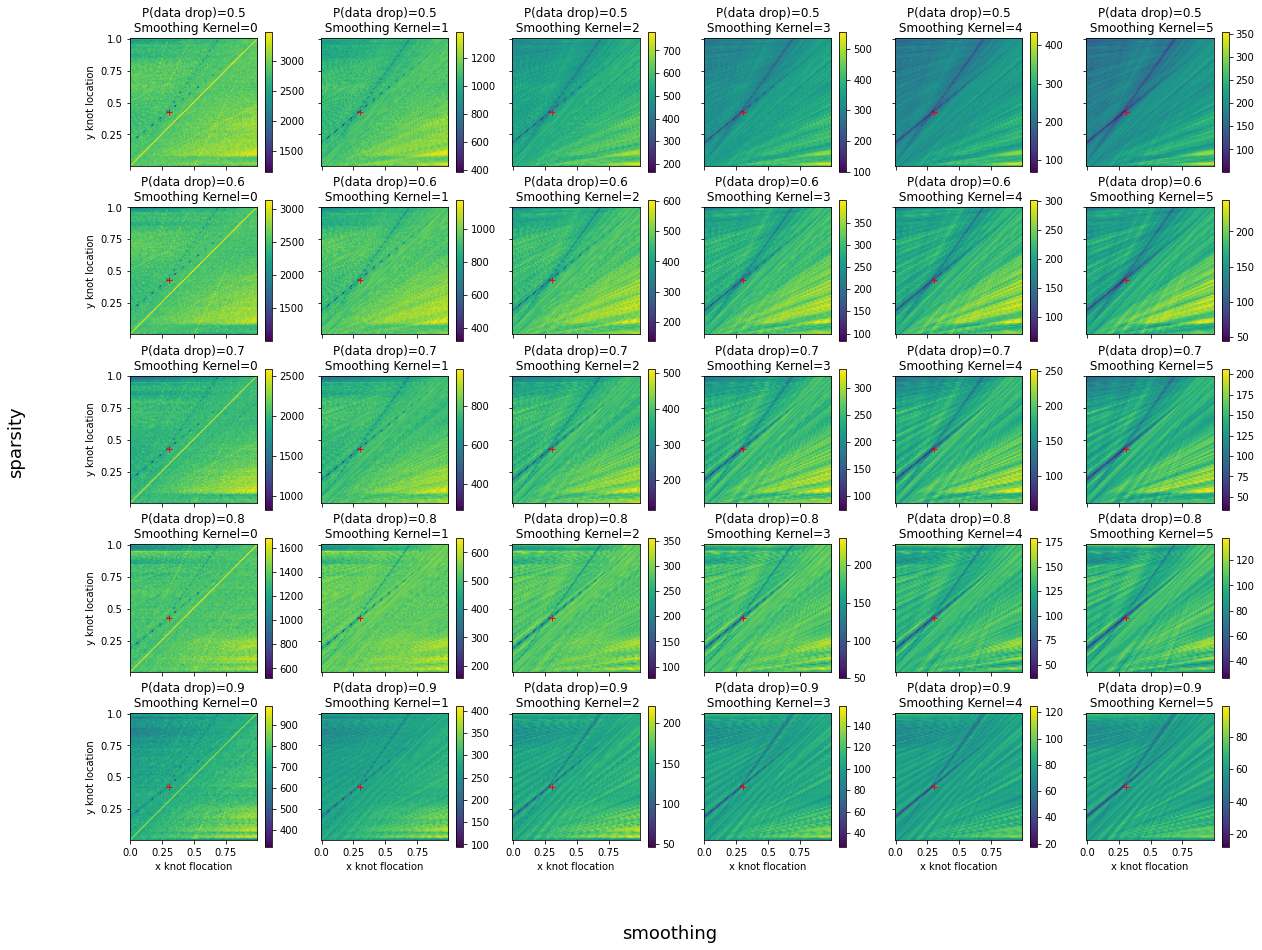

In [176]:
sparsity_range=np.arange(0.5,1,0.1)
smooth_range=np.arange(0,6)
knot_loc=np.arange(0.05,1,0.01)

#sparsity_range=np.arange(0.1,0.6,0.3)
#smooth_range=np.arange(0,6)
#knot_loc=np.arange(0.05,1,0.03)

fig, axes = plt.subplots(len(sparsity_range), len(smooth_range), sharex=True, sharey=True, figsize=(20, 15))

for spa_ind, smooth_ind in itertools.product(range(len(sparsity_range)),range(len(smooth_range))):
    binned, true_model = piecewise_warped_data(n_knots=1,n_trials=1,n_timepoints=2800,n_neurons=1,
            clip_y_knots=True,
            template_scale=1.0,
            template_drop=sparsity_range[spa_ind],
            template_smoothness=smooth_range[smooth_ind],
            noise_type="",
            seed=1234)
        
    m=copy.deepcopy(true_model) 
    obj_all=np.zeros((len(knot_loc),len(knot_loc)))
    m._initialize_storage(1)

    for i in range(0,len(knot_loc)):
        for j in range(0,len(knot_loc)):
            m.y_knots[0,1]=knot_loc[i]
            m.x_knots[0,1]=knot_loc[j]
            #m._fit_template(data)
            #m._record_loss(binned)
            obj_all[i,j]=np.sum((m.predict()-binned)**2)#m.objective_hist[-1]
        
        # Plot data.
    ax=axes[spa_ind,smooth_ind]
    PCM=ax.imshow(np.flipud(obj_all), aspect='equal')
    test=plt.colorbar(PCM,ax=ax)
        
        
    locs, labels = plt.xticks()
    plt.xticks(np.linspace(0,len(knot_loc),5),np.linspace(0,1,5))
    plt.yticks(np.flipud(np.linspace(0,len(knot_loc),5)),np.linspace(0,1,5))
    ax.plot(true_model.x_knots[0,1]*len(knot_loc),(1-true_model.y_knots[0,1])*len(knot_loc),'r+') 
    
    ax.set_title('P(data drop)='+str(round(sparsity_range[spa_ind],1))+'\n Smoothing Kernel='+str(round(smooth_range[smooth_ind],1)))

        
for i in range(len(smooth_range)):
    axes[-1,i].set_xlabel('x knot flocation')
for i in range(len(sparsity_range)):
    axes[i,0].set_ylabel('y knot location')

fig.text(0.5, 0.04, 'smoothing', ha='center',fontsize=18)
fig.text(0.04, 0.5, 'sparsity', va='center', rotation='vertical',fontsize=18)

#### 3) Use one trial of real data and do the same thing. See what the landscape looks like

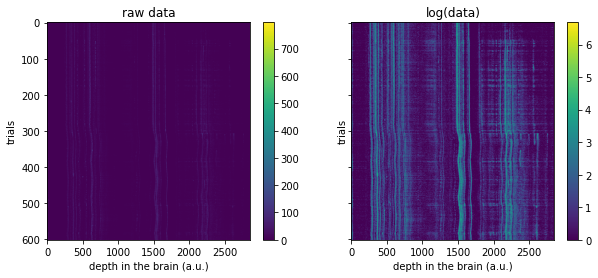

In [133]:
# load e-mouse data
data=np.load('data/data_1of_a_second.npy').T
data_log=np.log(1+data)
data=np.expand_dims(data, axis=2)
data_log=np.expand_dims(data_log, axis=2)

# Plot data.
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 4))
PCM=axes[0].imshow(np.squeeze(data), aspect='auto')
axes[0].set_title('raw data')
axes[0].set_xlabel('depth in the brain (a.u.)')
axes[0].set_ylabel('trials')
plt.colorbar(PCM,ax=axes[0])

PCM=axes[1].imshow(np.squeeze(data_log), aspect='auto')
axes[1].set_title('log(data)')
axes[1].set_xlabel('depth in the brain (a.u.)')
axes[1].set_ylabel('trials')
plt.colorbar(PCM,ax=axes[1])

##### First, without noise

###### a) raw form of data

In [191]:
from affinewarp.piecewisewarp import PiecewiseWarping

true_model = PiecewiseWarping(n_knots=1)
true_model.x_knots=np.array([0,0.5,1]).reshape((1,-1))
true_model.y_knots=np.array([0,0.7,1]).reshape((1,-1))
true_model.template=data[2,:,:]
binned=true_model.predict()

knot_loc=np.arange(0.05,1,0.01)
m=copy.deepcopy(true_model) 
obj_all=np.zeros((len(knot_loc),len(knot_loc)))
m._initialize_storage(1)

for i in range(0,len(knot_loc)):
    for j in range(0,len(knot_loc)):
        m.y_knots[0,1]=knot_loc[i]
        m.x_knots[0,1]=knot_loc[j]
        obj_all[i,j]=np.sum((m.predict()-binned)**2)#m.objective_hist[-1]

###### b) log form of data

In [192]:
true_model.template=data_log[0,:,:]
binned_log=true_model.predict()

m=copy.deepcopy(true_model) 
obj_all_log=np.zeros((len(knot_loc),len(knot_loc)))
m._initialize_storage(1)

for i in range(0,len(knot_loc)):
    for j in range(0,len(knot_loc)):
        m.y_knots[0,1]=knot_loc[i]
        m.x_knots[0,1]=knot_loc[j]
        obj_all_log[i,j]=np.sum((m.predict()-binned_log)**2)#m.objective_hist[-1]

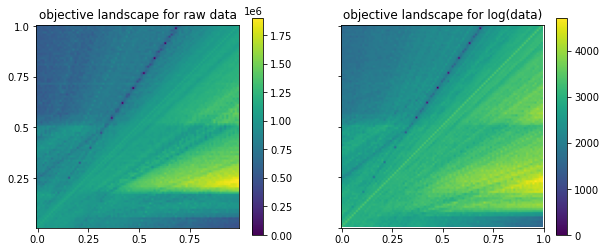

In [193]:
# Plot landscape.
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10, 4))
PCM=axes[0].imshow(np.flipud(obj_all), aspect='equal')
locs, labels = plt.xticks()
axes[0].set_title('objective landscape for raw data')
plt.xticks(np.linspace(0,len(knot_loc),5),np.linspace(0,1,5))
plt.yticks(np.flipud(np.linspace(0,len(knot_loc),5)),np.linspace(0,1,5))
plt.colorbar(PCM,ax=axes[0])

PCM=axes[1].imshow(np.flipud(obj_all_log), aspect='equal')
locs, labels = plt.xticks()
axes[1].set_title('objective landscape for log(data)')
plt.xticks(np.linspace(0,len(knot_loc),5),np.linspace(0,1,5))
plt.yticks(np.flipud(np.linspace(0,len(knot_loc),5)),np.linspace(0,1,5))
plt.colorbar(PCM,ax=axes[1])

##### Secondly, with various noise

In [225]:
data_std=np.std(np.log(1+data[1,:,:]))
print('data sample standard deviate', data_std)

data sample standard deviate 1.0745259173541901


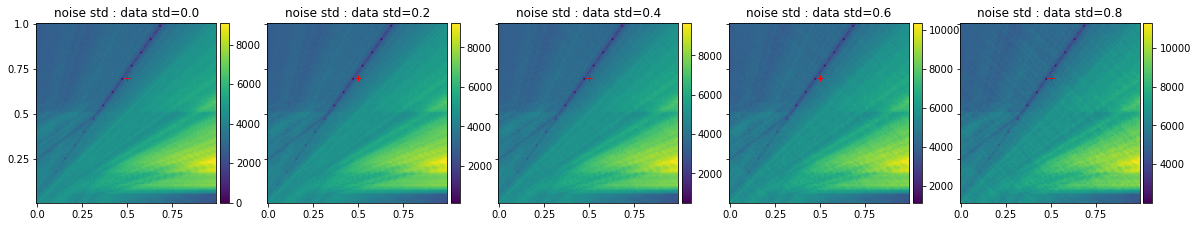

In [226]:
noise_range=np.arange(0,1,0.2)
true_model.template=np.log(1+data[1,:,:])
binned_log=true_model.predict()

fig, axes = plt.subplots(1, len(noise_range), sharex=True, sharey=True, figsize=(20, 15))
for noise_ind in range(len(noise_range)):

    noise_scale=noise_range[noise_ind]*data_std
    m=copy.deepcopy(true_model) 
    obj_all_noise=np.zeros((len(knot_loc),len(knot_loc)))
    m._initialize_storage(1)

    for i in range(0,len(knot_loc)):
        for j in range(0,len(knot_loc)):
            m.y_knots[0,1]=knot_loc[i]
            m.x_knots[0,1]=knot_loc[j]
            rs = np.random.RandomState(i+j)
            noise=rs.normal(loc=0.0, scale=noise_scale, size=np.shape(binned))
            obj_all_noise[i,j]=np.sum((m.predict()-(binned_log+noise))**2)#m.objective_hist[-1]
            
    PCM=axes[noise_ind].imshow(np.flipud(obj_all_noise), aspect='equal')
    locs, labels = plt.xticks()
    axes[noise_ind].set_title('noise std : data std='+str(round(noise_range[noise_ind],1)))
    
    axes[noise_ind].set_xticks(np.linspace(0,len(knot_loc),5))
    axes[noise_ind].set_xticklabels(np.linspace(0,1,5))
    axes[noise_ind].set_yticks(np.flipud(np.linspace(0,len(knot_loc),5)))
    axes[noise_ind].set_yticklabels(np.linspace(0,1,5))
    axes[noise_ind].plot(true_model.x_knots[0,1]*len(knot_loc),(1-true_model.y_knots[0,1])*len(knot_loc),'r+') 
    
    divider = make_axes_locatable(axes[noise_ind])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(PCM,cax=cax)